#Grouped barplots

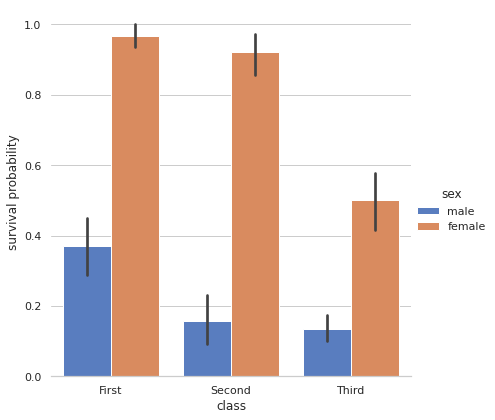

In [9]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

#Grouped boxplots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


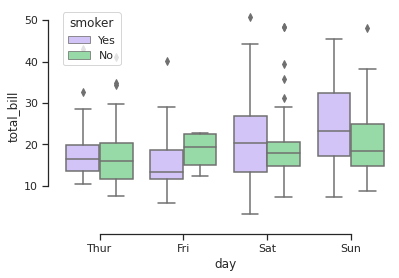

In [1]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

#Grouped violinplots with split violins

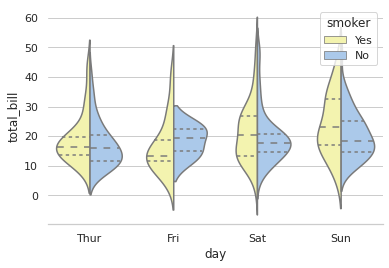

In [2]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

#Annotated heatmaps


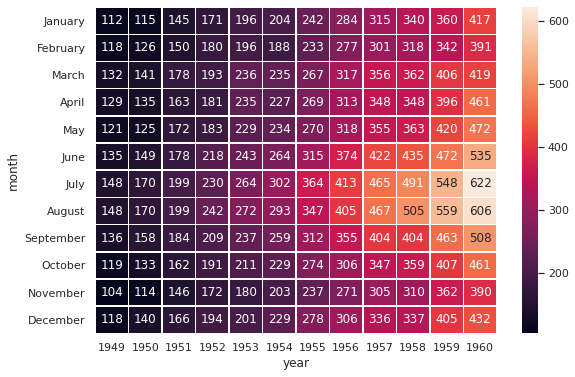

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

#Hexbin plot with marginal distributions

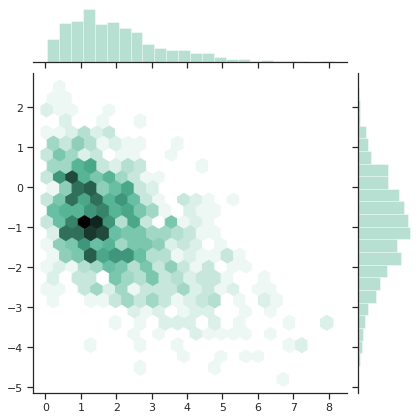

In [4]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

#Horizontal bar plots

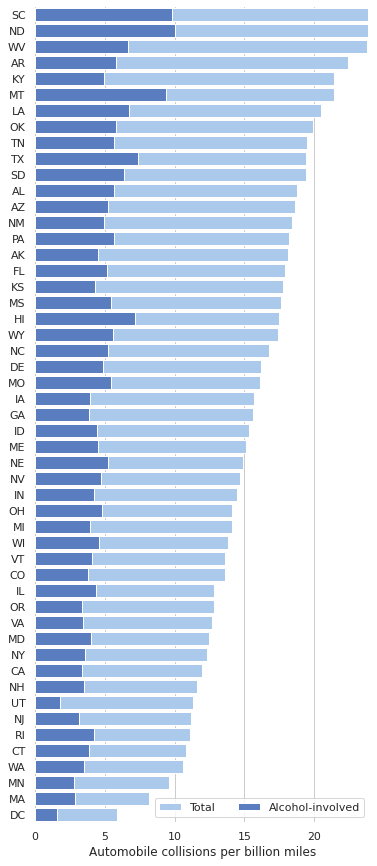

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

#Horizontal boxplot with observations

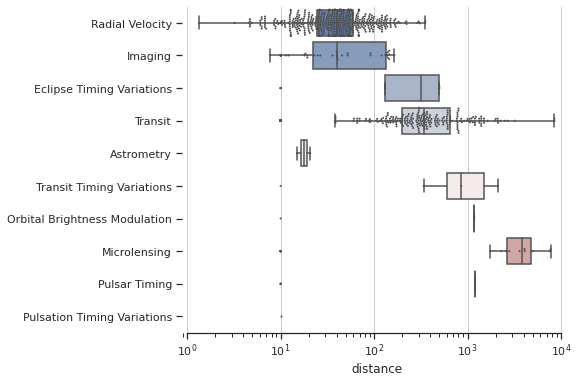

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

#Strip Plot

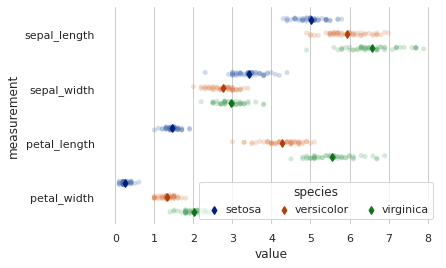

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

#Joint kernel density estimate

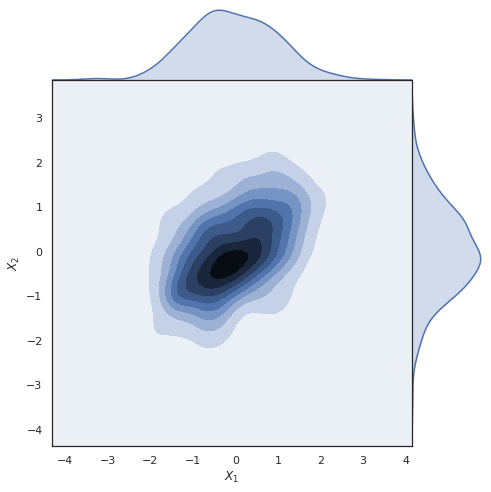

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)